In [6]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os
import cv2

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [7]:
import os
os.chdir('d:\\NLP_Papers_Review')
os.getcwd()
DATA_PATH=os.getcwd()

# 데이터 복사및 압축풀기
- train, test 폴더가 생기고 각 폴더 안에 이미지와 파일명과 정답값이 있는 csv 파일이 있다.

In [8]:
import zipfile
import os

# 압축 파일 경로
zip_path = DATA_PATH+"/data/meat.zip"

# 압축 해제될 디렉토리
extract_to = DATA_PATH+"/data/meat"

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# 이미지 파일명과 정답값이 있음

In [9]:
train = pd.read_csv( DATA_PATH+"/data/meat/train/class_info.csv")
test = pd.read_csv( DATA_PATH+"/data/meat/test/class_info.csv")
train.shape, test.shape

((1246, 2), (1020, 2))

# 정답값
- 0: 신선한 고기
- 1: 먹을만한 고기
- 2: 상한 고기

In [10]:
train["target"].value_counts(normalize=True)

0    0.376404
1    0.348315
2    0.275281
Name: target, dtype: float64

In [11]:
train.head()

,filename,target
0,1074.jpg,0
1,1222.jpg,1
2,2105.jpg,1
3,81.jpg,2
4,1791.jpg,2


In [12]:
test.head()

,filename,target
0,1505.jpg,NaN
1,403.jpg,NaN
2,570.jpg,NaN
3,891.jpg,NaN
4,1633.jpg,NaN


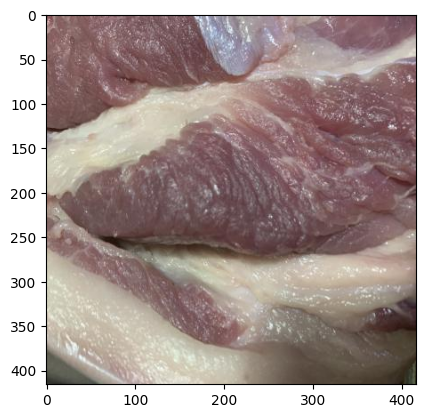

In [13]:
import matplotlib.pyplot as plt

arr = cv2.imread(DATA_PATH+"/data/meat/train/104.jpg")
arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB) # RGB 순서로 변경
plt.imshow(arr)
plt.show()

- 이미지 데이터 경로들을 담는 배열 생성

In [14]:
train_path = ("/data/meat/train/" + train["filename"]).to_numpy()
train_path

array(['/data/meat/train/1074.jpg', '/data/meat/train/1222.jpg',
       '/data/meat/train/2105.jpg', ..., '/data/meat/train/776.jpg',
       '/data/meat/train/750.jpg', '/data/meat/train/948.jpg'],
      dtype=object)

In [15]:
test_path = ("/data/meat/test/" + test["filename"]).to_numpy()
test_path

array(['/data/meat/test/1505.jpg', '/data/meat/test/403.jpg',
       '/data/meat/test/570.jpg', ..., '/data/meat/test/1265.jpg',
       '/data/meat/test/422.jpg', '/data/meat/test/1602.jpg'],
      dtype=object)

- pytorch 에서 정답데이터
    - 이진 분류와 회귀문제
        - 2차원형태의 데이터 타입은 float32 으로 해줘야 함.
    - 다중 분류
        - 1차원형태의 데이터 타입은 int64 으로 해줘야 함.

- 정답데이터

In [16]:
target = train["target"].to_numpy()
target

array([0, 1, 1, ..., 2, 0, 2], dtype=int64)

In [17]:
target.dtype

dtype('int64')

# transform 객체

In [19]:
!pip install albumentations

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.2.0 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.5.0 which is incompatible.
sktime 0.21.1 requires scikit-learn<1.4.0,>=0.24.0, but you have scikit-learn 1.5.0 which is incompatible.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.



  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pydantic-2.7.1-py3-none-any.whl.metadata (107 kB)
Using cached pydantic-2.7.1-py3-none-any.whl (409 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.8
    Uninstalling pydantic-1.10.8:
      Successfully uninstalled pydantic-1.10.8


In [24]:
!pip uninstall albumentations pydantic


^C


In [22]:
!pip install albumentations --upgrade
!pip install pydantic --upgrade


In [20]:
!pip install albumentations==1.4.7 pydantic==1.10.7


     ---------------------------------------- 0.0/146.6 kB ? eta -:--:--
     ----- ------------------------------- 20.5/146.6 kB 320.0 kB/s eta 0:00:01
     -------------------------- ----------- 102.4/146.6 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 146.6/146.6 kB 1.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    The user requested pydantic==1.10.7
    albumentations 1.4.7 depends on pydantic>=2.7.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict



ERROR: Cannot install albumentations==1.4.7 and pydantic==1.10.7 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [23]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

ImportError: cannot import name 'ValidationInfo' from 'pydantic' (c:\Users\jaeyeon\anaconda3\Lib\site-packages\pydantic\__init__.cp311-win_amd64.pyd)

In [ ]:
lst = [
    A.Resize(224,224),
    # A.HorizontalFlip(p=0.5),
    # A.VerticalFlip(p=0.5),
    A.Normalize(), # 스케일후 정규화 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    ToTensorV2() # C ,H , W 순서의 텐서로 변환
]
train_transform = A.Compose(lst)

lst = [
    A.Resize(224,224),
    A.Normalize(), # 스케일후 정규화 mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    ToTensorV2() # C ,H , W 순서의 텐서로 변환
]
test_transform = A.Compose(lst)

# 데이터셋 클래스

In [ ]:
class MeatDataset(torch.utils.data.Dataset):
    def __init__(self, transform, x, y=None):
        # 파라미터로 받은 객체 인스턴스 변수에 저장
        self.transform = transform
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x) # 샘플 총 개수 반환

    def __getitem__(self, idx): # 인덱스를 받아 입력텐서와 정답텐서를 반환
        item = {}
        x = cv2.imread( self.x[idx] ) # BGR 순서로 로딩
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) # RGB 순서로 변환
        item["x"] = self.transform(image = x)["image"] # 키워드 아규먼트 형식으로 전달 후 "image" 키 안에 텐서를 가져와야 함
        if self.y is not None:
            # 다중분류에서는 정답데이터의 데이터 타입이 int64 여야 하기 때문에
            # 입력받은 데이터 타입을 유지하면서 텐서로 변환해주는 tensor 함수를 사용함
            item["y"] = torch.tensor( self.y[idx] )

        return item

In [ ]:
dt = MeatDataset(train_transform, train_path, target)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle=False)
batch = next(iter(dl))
batch

{'x': tensor([[[[ 1.5468,  1.4269,  1.5639,  ...,  1.4269,  0.8618,  0.6049],
           [ 1.4612,  1.4440,  1.4954,  ...,  1.5982,  1.3755,  0.9132],
           [ 1.4269,  1.4783,  1.4269,  ...,  1.6838,  1.5810,  1.3927],
           ...,
           [ 0.4166,  0.5193,  0.5536,  ...,  0.2282,  0.1768,  0.3994],
           [ 0.4508,  0.5707,  0.5878,  ..., -0.0801,  0.1083,  0.2453],
           [ 0.4337,  0.5536,  0.5707,  ...,  0.0398, -0.1143,  0.2624]],
 
          [[ 1.5007,  1.3782,  1.5182,  ...,  1.3431,  0.6779,  0.3803],
           [ 1.4132,  1.3957,  1.4482,  ...,  1.5357,  1.2206,  0.6954],
           [ 1.3782,  1.4307,  1.3782,  ...,  1.6232,  1.4482,  1.2206],
           ...,
           [ 0.2402,  0.3452,  0.3803,  ..., -0.5826, -0.6352, -0.4076],
           [ 0.2927,  0.3978,  0.4153,  ..., -0.8978, -0.7402, -0.6001],
           [ 0.2577,  0.3803,  0.3978,  ..., -0.8102, -0.9678, -0.5826]],
 
          [[ 1.5071,  1.3851,  1.5245,  ...,  1.4025,  0.7751,  0.5136],
        

# timm 라이브러리
- 컴퓨터 비전 분야 사전학습 모델을 제공

```shell
pip install timm
```

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.1 MB/s eta 0:00:00


In [ ]:
import timm

- 사용 가능한 사전학습 모델 확인

In [ ]:
timm.list_models(pretrained=True)

['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

In [ ]:
timm.list_models("*resnet*", pretrained=True) # resnet 관련 모델만 보기

['cspresnet50.ra_in1k',
 'eca_resnet33ts.ra2_in1k',
 'ecaresnet26t.ra2_in1k',
 'ecaresnet50d.miil_in1k',
 'ecaresnet50d_pruned.miil_in1k',
 'ecaresnet50t.a1_in1k',
 'ecaresnet50t.a2_in1k',
 'ecaresnet50t.a3_in1k',
 'ecaresnet50t.ra2_in1k',
 'ecaresnet101d.miil_in1k',
 'ecaresnet101d_pruned.miil_in1k',
 'ecaresnet269d.ra2_in1k',
 'ecaresnetlight.miil_in1k',
 'gcresnet33ts.ra2_in1k',
 'gcresnet50t.ra2_in1k',
 'inception_resnet_v2.tf_ens_adv_in1k',
 'inception_resnet_v2.tf_in1k',
 'lambda_resnet26rpt_256.c1_in1k',
 'lambda_resnet26t.c1_in1k',
 'lambda_resnet50ts.a1h_in1k',
 'legacy_seresnet18.in1k',
 'legacy_seresnet34.in1k',
 'legacy_seresnet50.in1k',
 'legacy_seresnet101.in1k',
 'legacy_seresnet152.in1k',
 'nf_resnet50.ra2_in1k',
 'resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet26.bt_i

In [ ]:
model_name = "wide_resnet50_2"

- create_model 함수
    - pytorch 모델 객체를 생성해 준다.
    - 첫번째 인수로 모델 이름을 전달
    - pretrained 파라미터에 True 전달할 경우 사전학습된 가중치가 반영되서 객체를 생성해 준다.
    - num_classes 파라미터에는 정수값을 전달하면 되는데 최종으로 몇개로 출력할 지를 지정하면 된다.

In [ ]:
np.unique(target)

array([0, 1, 2])

In [ ]:
model = timm.create_model(model_name, pretrained=True, num_classes=3)
model(batch["x"])

model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

tensor([[-0.0219,  0.0376,  0.0595],
        [-0.0246,  0.0226, -0.0797]], grad_fn=<AddmmBackward0>)

# 모델 만들기

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, model_name, num_classes):
        super().__init__()
        self.pre_model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)

    def forward(self, x):
        return self.pre_model(x)

# 학습 loop 함수 만들기
- 미니 배치 단위로 학습 하기 때문
- 다음의 함수가 한번 실행이 되면 한번에 에폭이 끝났다는 말과 같다!

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0 # 에폭 로스를 확인하기 위해 변수 초기화
    model.train() # 학습 모드
    for batch in dataloader: # 배치 사이즈 만큼 배치 단위로 학습하기 위한 for문
        pred = model( batch["x"].to(device) ) # 입력 텐서를 모델과 동일한 장치로 이동후 모델에 전달 ->  예측값
        loss = loss_fn( pred, batch["y"].to(device) ) # 손실객체를 이용해 예측값과 정답데이터의 오차를 구함
        optimizer.zero_grad() # optimizer는 기본적으로 경사를 누적을함, 잘못된 계산을 막기위해 경사를 0으로 초기화
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트
        epoch_loss += loss.item() # 배치 손실을 누적
    epoch_loss /= len(dataloader) # 평균내서 에폭 손실을 구함.
    return epoch_loss

# 검증 또는 테스트 loop 함수
- 검증 데이터와 같이 입력(x), 정답(y) 가 있을 때 검증 loss 를 확인하는 기능
- 테스트 데이터와 같인 입력(x) 만 있을 때 예측만 하는 기능


In [ ]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0 # 검증데이터에 대한 loss 변수 초기화
    pred_list = [] # 예측값들을 담을 리스트
    act_func = torch.nn.Softmax(dim=1) # 예측 값들을 확률 변환하기 위한 객체(회귀문제에서는 주석처리)
    model.eval() # 평가 모드
    for batch in dataloader: # 배치 단위로 예측하기 위한 for문
        pred = model( batch["x"].to(device) ) # 입력 텐서를 장치 이동후  모델에 전달 ->  예측값
        if batch.get("y") is not None: # batch에 정답 데이터가 있다면 실행하는 조건문
            loss = loss_fn( pred, batch["y"].to(device) ) # 검증 데이터에 대한 손실을 계산
            epoch_loss += loss.item() # 검증 데이터의 배치 loss 누적
        pred = act_func(pred) # 모델의 logit 값을 확률로 변환(회귀문제에서는 주석처리)
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환(이 함수가 실행되면 예측값들을 반환하기 위해)
        pred_list.append(pred) # 배치단위 예측값들을 모두 concat 하기위해 append!!
    epoch_loss /= len(dataloader) # 검증 데이터의 배치 loss 를 평균내서 평균 loss 구함
    pred = np.concatenate(pred_list) # 배치 단위 예측값들을 모두 결합
    return epoch_loss, pred # 검증 loss 와 예측값을 반환

# 하이퍼 파라미터 정의

In [ ]:
n_splits = 5 # K-fold 의 K 값
batch_size = 32 # 몇개의 샘플씩 묶어서 배치를 만들건지에 대한 개수
epochs = 100 # 최대 에폭 횟수
loss_fn = torch.nn.CrossEntropyLoss() # 손실 객체

model_name = "wide_resnet50_2" # 사전학습 모델 ID
num_classes = 3 # 정답 클래스 개수

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

# 학습
- CV 진행하여 학습한다.
    - K번의 학습이 진행되고, K개의 학습된 별도의 모델이 생성
- 각 K개의 모델은 여러번 에폭을 수행하여 학습을 한다.
    - 적절한 에폭수 에서 중지를 시켜줘야 한다.

In [ ]:
is_holdout = True
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = [] # 각 폴드별 최고 점수가 저장되는 리스트
for i, (tri, vai) in enumerate( cv.split(train) ):
    # 학습용 데이터
    x_train = train_path[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train_path[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = MeatDataset(train_transform, x_train, y_train) # 데이터셋 객체 생성
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True) # 데이터로더 객체 생성

    # 검증용 데이터로더 객체
    valid_dt = MeatDataset(test_transform, x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False) # 검증시 shuffle 하면 안된다!!

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(model_name, num_classes).to(device) # 모델 객체 생성시 장치 이동 시킬 것!
    optimizer = torch.optim.Adam( model.parameters() ) # optimizer 생성시 모델 객체의 가중치를 전달해줘야 한다.

    best_score = 0 # 현재 최고 점수를 담을 변수를 초기화
    patience = 0 # 반복 되는 에폭을 중지하기 위한 변수 초기화
    for epoch in tqdm( range(epochs) ): # epochs 변수에 정의된 횟수 만큼의 반복문
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device) # 학습하는 함수(학습 loss 반환)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device) # 검증loss 및 예측값을 반환 하는 함수
        pred = np.argmax(pred, axis=1) # 각 예측값별로 가장 높은 확률의 열부분 인덱스(클래스 번호) 구함
        score = f1_score(y_valid, pred, average="micro") # 현재 에폭의 검증 점수
        print(train_loss, valid_loss, score)
        if score > best_score: # 최고점수보다 현재 에폭의 점수가 크다면
            best_score = score # 최고 점수 업데이트
            patience = 0 # 검증점수가 개선이 되서 0으로 초기화
            torch.save(model.state_dict(), f"model_{i}.pth") # 최고 점수 모델 가중치 저장

        patience += 1 # 반복되는 에폭을 중지하기 위한 변수를 1씩 증가

        # 조기 종료를 위한 조건문,
        # ex) 5번 연속으로 검증 점수가 개선이 없을 경우 에폭 반복을 중지하고 안쪽 for문을 빠져 나간다.
        if patience == 5:
            break
    print(f"{i}번째 폴드 최고 F1-score micro: {best_score}")
    best_score_list.append(best_score)

    torch.cuda.empty_cache() # gpu 메모리 청소
    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.30278201994951814 0.3148628599010408 0.916


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.16940117627382278 0.5659799380227923 0.912


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.1593347204325255 0.3379887146875262 0.908


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.16862558689899743 0.033108078001532704 0.984


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.19129853893537074 0.3334900140762329 0.8960000000000001


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.1509912948240526 0.2668745256960392 0.916


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.10640648333355784 0.29429353307932615 0.94


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.06332913461483258 0.03746636930736713 0.988


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.027041786825066083 0.10704652473214082 0.964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.03117380590265384 0.15284346576663665 0.96


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.11257354321787716 0.04662148444913328 0.984


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.1446267066639848 0.04767714929766953 0.98
0번째 폴드 최고 F1-score micro: 0.988


# 테스트 데이터 추론하기

In [ ]:
test_dt = MeatDataset(test_transform, test_path)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False) # 테스트 예측시 shuffle 하지 말것!!

In [ ]:
pred_list = [] # k-fold 에 경우 여러개의 모델이 나오기 때문에 모델별로 예측값들 담아줄 리스트
for i in range(n_splits):
    model = Net(model_name, num_classes).to(device) # 모델 객체 생성후 장치 이동
    state_dict = torch.load(f"model_{i}.pth") # 학습된 가중치 불러오기
    model.load_state_dict(state_dict) # 모델 객체에 불러온 가중치 적용!!

    _, pred = test_loop(test_dl, model, loss_fn, device) # 예측
    pred_list.append(pred)
    if is_holdout:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
pred = np.mean(pred_list , axis=0)
pred

array([[1.07924762e-07, 1.08530321e-05, 9.99989033e-01],
       [7.14151235e-03, 9.92814660e-01, 4.38413299e-05],
       [1.52562663e-07, 9.99999762e-01, 8.71774830e-08],
       ...,
       [9.16570627e-07, 1.17974188e-04, 9.99881029e-01],
       [6.18150271e-03, 9.88831103e-01, 4.98745637e-03],
       [9.99437511e-01, 5.47181640e-04, 1.52030125e-05]], dtype=float32)

In [ ]:
np.argmax(pred, axis=1)

array([2, 1, 1, ..., 2, 1, 0])